# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.09749999782070518


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [6]:
env_info


In [7]:
%load_ext autoreload
%autoreload 2

from p2_agent import A2C_Agent

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

states = env_info.vector_observations
state_size = states.shape[1]
action_size = brain.vector_action_space_size
seed = 1234

agent = A2C_Agent( state_size, action_size, device, seed, 
                  LR=0.0007, 
                  entropy_weight=0.01, 
                  nstepqlearning_size=5, 
                  gamma=0.925, 
                  gae_lambda=1.0,
                  actor_network_max_grad_norm = 15,
                  critic_network_max_grad_norm = 15 )


----Dumping agent hyperparameters---- 
LR:  0.0007
gamma:  0.925
actor_network_max_grad_norm:  15
critic_network_max_grad_norm:  15
nstepqlearning_size:  5
gae_lambda:  1.0
entropy_weight:  0.01
------------------------------------- 
Creating model with  64  and  64  hidden layer sizes.
Creating model with  64  and  64  hidden layer sizes.


In [8]:
from collections import deque 

def a2c(episode=10):

    solved=False
    scores_window = deque(maxlen=100)  # last 100 scores
    all_avg_scores = [] 
    
    for e in range(episode):
        scores = agent.train_one_episode(env, brain_name)

        mean_score = np.mean(scores)
        scores_window.append(mean_score)       # save most recent score (prev. 100 episodes)
        all_avg_scores.append(mean_score)      # save most recent score (save scores of all episodes for drawing graph)
    
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(e, np.mean(scores_window)), end="")
        if e % 10 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(e, np.mean(scores_window)))
        if solved==False and np.mean(scores_window)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(e-100, np.mean(scores_window)))
            solved=True
        if np.mean(scores_window)>=35.0:
            print('\nEnvironment reached average score 35 in {:d} episodes!\tAverage Score: {:.2f}'.format(e-100, np.mean(scores_window)))
            torch.save(agent.actor_net.state_dict(), "actor_net.pth")
            torch.save(agent.critic_net.state_dict(), "critic_net.pth")
            print("Model saved.")
            break

    return all_avg_scores


In [9]:
scores = a2c(1000)
#scores = a2c(1)


Episode 0	Average Score: 1.07
Episode 10	Average Score: 1.34
Episode 20	Average Score: 2.12
Episode 30	Average Score: 2.93
Episode 40	Average Score: 3.51
Episode 50	Average Score: 4.18
Episode 60	Average Score: 5.39
Episode 70	Average Score: 7.76
Episode 80	Average Score: 11.17
Episode 90	Average Score: 13.86
Episode 100	Average Score: 16.27
Episode 110	Average Score: 19.85
Episode 120	Average Score: 23.26
Episode 130	Average Score: 26.50
Episode 140	Average Score: 29.71
Episode 141	Average Score: 30.01
Environment solved in 41 episodes!	Average Score: 30.01
Episode 150	Average Score: 32.77
Episode 159	Average Score: 35.15
Environment reached average score 35 in 59 episodes!	Average Score: 35.15
Model saved.


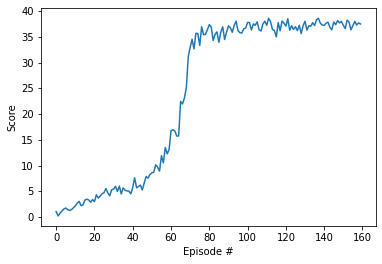

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
#
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


In [11]:
# Reload an agent with random parameters,
# Then load the previously saved networks 

agent = A2C_Agent( state_size, action_size, device, seed, 
                  LR=0.0007, 
                  entropy_weight=0.01, 
                  nstepqlearning_size=5, 
                  gamma=0.925, 
                  gae_lambda=1.0,
                  actor_network_max_grad_norm = 15,
                  critic_network_max_grad_norm = 15 )
agent.actor_net.load_state_dict(torch.load("actor_net.pth"))
agent.critic_net.load_state_dict(torch.load("critic_net.pth"))
print("Model loaded.")

----Dumping agent hyperparameters---- 
LR:  0.0007
gamma:  0.925
actor_network_max_grad_norm:  15
critic_network_max_grad_norm:  15
nstepqlearning_size:  5
gae_lambda:  1.0
entropy_weight:  0.01
------------------------------------- 
Creating model with  64  and  64  hidden layer sizes.
Creating model with  64  and  64  hidden layer sizes.
Model loaded.


In [12]:
# Play an episode and print the average score of all (20) playing agents

print("Playing an episode.")
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
num_agents = len(env_info.agents)

print("Using agents: ", num_agents)

states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    (actions, _, _, _) = agent.act(states)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break

mean_score = np.mean(scores)
print("After playing one episode on every simulated agents the average score is: ", mean_score)


Playing an episode.
Using agents:  20
After playing one episode on every simulated agents the average score is:  34.06999923847616


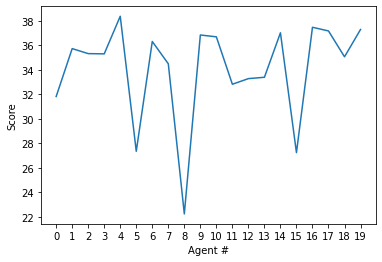

In [13]:
# Plot the distribution of scores among the participant agents 
# plot the scores of the different agents

import matplotlib.pyplot as plt
%matplotlib inline
#
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Agent #')
ind = np.arange(num_agents)    # the x locations for the groups
ax.set_xticks(ind)
plt.show()



When finished with everything, you can close the environment.

In [14]:
env.close()